# Imports

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference.bn_inference import BayesianModelProbability

In [2]:
from phik.report import plot_correlation_matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import phik
from phik import resources
import openpyxl

In [5]:
import fnmatch

In [6]:
import numpy as np

# Loading Data

In [8]:
pathToDataFile = "../data/2017.xlsx"
scholierenData = pd.read_excel(pathToDataFile, "Resultaten", engine='openpyxl')

In [9]:
scholierenData

,ID,Advies,Voorgeselecteerd,Lotnummer,Geplaatst op,Voorrang/Hardheid eerste voorkeur,Voorkeur 1,Voorkeur 2,Voorkeur 3,Voorkeur 4,...,Voorkeur 29,Voorkeur 30,Voorkeur 31,Voorkeur 32,Voorkeur 33,Voorkeur 34,Voorkeur 35,Voorkeur 36,Voorkeur 37,Voorkeur 38
0,1,vwo,-,7583,Niet geplaatst,-,Hervormd Lyceum Zuid - universalis vwo,Het Amsterdams Lyceum vwo,Hervormd Lyceum Zuid vwo,Fons Vitae Lyceum vwo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,vwo,-,7529,Niet geplaatst,-,Het 4E Gymnasium vwo,Vossius Gymnasium vwo,Ignatiusgymnasium vwo,Barlaeus Gymnasium vwo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,vwo,-,7544,Niet geplaatst,-,Hyperion Lyceum vwo,Barlaeus Gymnasium vwo,Vossius Gymnasium vwo,Het 4E Gymnasium vwo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,vmbo - basis/kader,-,6360,Niet geplaatst,-,"Open Schoolgemeenschap Bijlmer vmbo-b, vmbo-b/k",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,vmbo - kader,-,6382,Niet geplaatst,-,IJburg College 1 vmbo-k,Open Schoolgemeenschap Bijlmer vmbo-k,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,7634,vmbo - basis/kader,-,4551,"Marcanti College vmbo-b, vmbo-b/k",-,"Marcanti College vmbo-b, vmbo-b/k","Mundus College vmbo-b, vmbo-b/k ± lwoo","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...","Calvijn College vmbo-b, vmbo-b/k ±lwoo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7634,7635,vmbo - basis,-,5536,"Marcanti College vmbo-b, vmbo-b/k",-,"Marcanti College vmbo-b, vmbo-b/k","Mundus College vmbo-b, vmbo-b/k ± lwoo","Montessori College Oost vmbo-b, vmbo-b/k, vmbo...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7635,7636,vmbo - basis/kader,-,5829,"Marcanti College vmbo-b, vmbo-b/k",-,"IJburg College 1 vmbo-b, vmbo-b/k","Open Schoolgemeenschap Bijlmer vmbo-b, vmbo-b/k","Marcanti College vmbo-b, vmbo-b/k","Stelle 2.0 vmbo-b, vmbo-b/k, vmbo-k ±lwoo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7636,7637,vmbo - basis/kader,-,6106,"Marcanti College vmbo-b, vmbo-b/k",-,"Marcanti College vmbo-b, vmbo-b/k","Calvijn College vmbo-b, vmbo-b/k ±lwoo","Wellantcollege Vmbo Sloten vmbo-b, vmbo-b/k, v...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns = scholierenData.columns

In [11]:
process_cols = fnmatch.filter(columns, "Voorkeur ?")

In [12]:
process_cols

['Voorkeur 1',
 'Voorkeur 2',
 'Voorkeur 3',
 'Voorkeur 4',
 'Voorkeur 5',
 'Voorkeur 6',
 'Voorkeur 7',
 'Voorkeur 8',
 'Voorkeur 9']

# Correlation Matrix

In [13]:
phik_overview = scholierenData[scholierenData.Advies == 'vwo'][process_cols].phik_matrix()

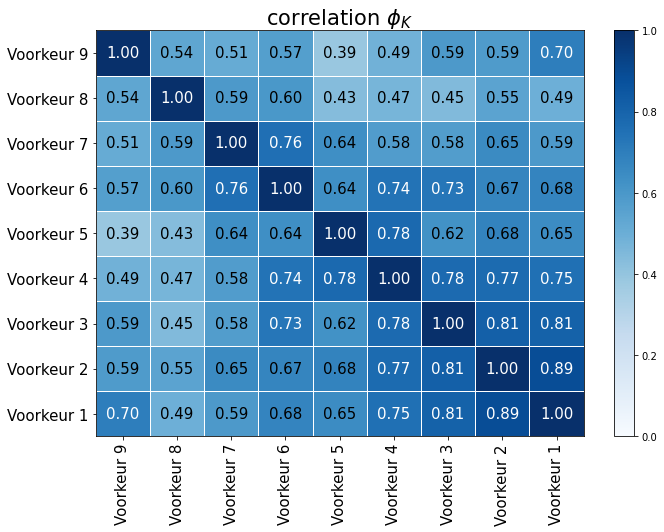

In [14]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,7.5))
plt.tight_layout()

# Building DAG

In [15]:
df = scholierenData[process_cols + ['Advies']].copy()

In [16]:
df.fillna("NaS", inplace=True)

In [17]:
# "tan" bayesian network needs string column names
est = TreeSearch(df, root_node='Voorkeur 1')
dag = est.estimate(
    estimator_type='tan',
    class_node='Advies',
    show_progress=True,
    # edge_weights_fn=self.edge_weights_fn
)

Building tree: 100%|████████████████████████████████████████████████████████████████████████████| 45/45.0 [00:00<00:00, 95.26it/s]


In [18]:
dag.edges()

OutEdgeView([('Voorkeur 1', 'Voorkeur 2'), ('Voorkeur 2', 'Voorkeur 3'), ('Voorkeur 3', 'Voorkeur 4'), ('Voorkeur 4', 'Voorkeur 5'), ('Voorkeur 5', 'Voorkeur 6'), ('Voorkeur 6', 'Voorkeur 7'), ('Voorkeur 7', 'Voorkeur 8'), ('Voorkeur 8', 'Voorkeur 9'), ('Advies', 'Voorkeur 1'), ('Advies', 'Voorkeur 2'), ('Advies', 'Voorkeur 3'), ('Advies', 'Voorkeur 4'), ('Advies', 'Voorkeur 5'), ('Advies', 'Voorkeur 6'), ('Advies', 'Voorkeur 7'), ('Advies', 'Voorkeur 8'), ('Advies', 'Voorkeur 9')])

# Fitting Bayesian Model to DAG

In [19]:
# model the conditional probabilities
bn = BayesianModel(dag.edges())
bn.fit(df)
# initialize sampler with fitted model
bn_sampler = BayesianModelSampling(bn)
bn_prob = BayesianModelProbability(bn)
# bn_ordering = [str(i) for i in range(X_discrete.shape[1])]

### Generating synthetic data from Bayesian sampler

In [20]:
df_gen = bn_sampler.forward_sample(size=10000)

Generating for node: Voorkeur 1:   0%|                                                                     | 0/10 [00:00<?, ?it/s]/Users/m.tasnimuva.nl/opt/anaconda3/envs/synth/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Generating for node: Voorkeur 9: 100%|████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.47it/s]


In [24]:
bn.get_cpds('Voorkeur 1')

<TabularCPD representing P(Voorkeur 1:142 | Advies:12) at 0x7fa3cdb56290>

In [25]:
df_gen

,Voorkeur 1,Voorkeur 2,Voorkeur 3,Voorkeur 4,Voorkeur 5,Voorkeur 6,Voorkeur 7,Voorkeur 8,Voorkeur 9,Advies
0,Het 4E Gymnasium vwo,Het Amsterdams Lyceum vwo,Het 4E Gymnasium vwo,Cartesius Lyceum vwo,Hyperion Lyceum vwo,Spinoza Lyceum atheneum - muziekplus vwo,Cygnus Gymnasium vwo,St. Nicolaaslyceum - tweetalig onderwijs vwo,Cygnus Gymnasium vwo,vwo
1,"Sweelinck College vmbo-t ±lwoo, vmbo-t/havo, havo","Berlage Lyceum - tweetalig onderwijs vmbo-t, v...","Geert Groote College vmbo-t, vmbo-t/havo","Christelijke Sgm Buitenveldert vmbo-t, vmbo-t/...","Het Reinaert vmbo-t ± lwoo, vmbo-t/havo",NaS,NaS,NaS,NaS,vmbo - theoretisch
2,Het Amsterdams Lyceum vwo,Fons Vitae Lyceum vwo,Pieter Nieuwland College vwo,Metis Montessori Lyceum vwo,Geert Groote College vwo,NaS,NaS,NaS,NaS,vwo
3,"Panta Rhei - game & technologieklas vmbo-b, vm...","Panta Rhei vmbo-b, vmbo-b/k, vmbo-k, vmbo-t ±l...","Scholengemeenschap Reigersbos vmbo-k, vmbo-t, ...",IJburg College 1 vmbo-k,"Stelle 2.0 vmbo-b, vmbo-b/k, vmbo-k ±lwoo",NaS,NaS,NaS,NaS,vmbo - kader
4,Vossius Gymnasium vwo,Cygnus Gymnasium vwo,Hervormd Lyceum Zuid - universalis vwo,Hervormd Lyceum Zuid vwo,Fons Vitae Lyceum vwo,Ignatiusgymnasium vwo,Fons Vitae Lyceum vwo,Hervormd Lyceum Zuid - universalis vwo,Het Amsterdams Lyceum vwo,vwo
...,...,...,...,...,...,...,...,...,...,...
9995,"Spinoza Lyceum havo, havo/vwo","Spinoza Lyceum - muziekplus havo, havo/vwo","St. Nicolaaslyceum havo, havo/vwo","Pieter Nieuwland College havo, havo/vwo","Fons Vitae Lyceum havo, havo/vwo","Cartesius Lyceum havo, havo/vwo","Cartesius 2 havo, havo/vwo",NaS,NaS,havo
9996,"Mediacollege Amsterdam vmbo-t ±lwoo, vmbo-t/havo","Panta Rhei - game & technologieklas vmbo-b, vm...","Panta Rhei - kookklas vmbo-b, vmbo-b/k, vmbo-k...","Panta Rhei - sportklas vmbo-b, vmbo-b/k, vmbo-...","Sweelinck College vmbo-t ±lwoo, vmbo-t/havo, havo","Bredero Mavo - vox-klassen vmbo-t ± lwoo, vmbo...","Montessori College Oost vmbo-b, vmbo-b/k, vmbo...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...",NaS,vmbo - theoretisch + lwoo
9997,"Hubertus & Berkhoff vakschool vmbo-b, vmbo-b/k...","Panta Rhei vmbo-b, vmbo-b/k, vmbo-k, vmbo-t ±l...","Zuiderlicht College vmbo-b, vmbo-b/k, vmbo-k, ...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...","Amsterdams Beroepscollege Noorderlicht vmbo-b,...","Zuiderlicht College vmbo-b, vmbo-b/k, vmbo-k, ...",NaS,NaS,NaS,vmbo - basis + lwoo
9998,Vossius Gymnasium vwo,Barlaeus Gymnasium vwo,Cygnus Gymnasium vwo,Het Amsterdams Lyceum vwo,Spinoza Lyceum atheneum vwo,NaS,NaS,NaS,NaS,vwo


#### Testing for duplicate column values

In [26]:
count=0
for index, row in df_gen.iterrows():
    k = row[~np.isin(row, ['NaS'])]
    #how many rows will have non-unique columns?
    if(len(k.unique()) < len(k)):
        count+=1
count

5454